## Reading and processing transcripts
here goes nothing...

In [1]:
import pandas as pd

In [2]:
transcript_df = pd.read_excel("data/excel/edi_2024_daniel_george.xlsx")

In [3]:
transcript_df.sample(5)

,Unnamed: 0,timestamp,speaker,utterance
357,357,00:28:06,Daniel,"OK, just put it. I'll try, OK."
154,154,00:11:49,Yuxuan,Usually it's just round round.
242,242,00:18:45,George,Just.
366,366,00:29:42,George,"Our names, including names and video title, wh..."
439,439,00:38:50,Yuxuan,Another.


In [4]:
transcript_df = transcript_df.drop(columns=["Unnamed: 0"])

In [5]:
transcript_df.sample(5)

,timestamp,speaker,utterance
322,00:25:02,Daniel,This is really fast.
346,00:27:19,Daniel,"I think this one looks fine, right?"
468,00:41:29,Daniel,"Add a thank you, Yeah, that's it. Thank you."
422,00:37:54,George,"Dining, to put as a joke like after and protot..."
72,00:07:14,Daniel,"I know it looks like Sakura, but I have someth..."


In [6]:
print("This transcript has", transcript_df.shape[0], "speech turns")

This transcript has 501 speech turns


In [7]:
unique_speaker = list(set(transcript_df["speaker"].to_list()))

In [8]:
unique_speaker[0]

'Unclear'

In [9]:
utterances = transcript_df["utterance"].to_list()

In [10]:
list_of_words = []

def count_words(list_of_utterances):
    for utterance in list_of_utterances :
        utterance = utterance.lower()
        words_in_utterance = utterance.split()
        list_of_words.extend(words_in_utterance)
        
    master_list_of_words = list(set(list_of_words))
    word_counts = [list_of_words.count(w) for w in master_list_of_words] # list comprehension
    word_counts_dict = { "word" : master_list_of_words, 
                         "count" : word_counts }
    counts_df = pd.DataFrame(word_counts_dict)
    counts_df.sample(5)
    return counts_df
    

In [11]:
transcript_wc_df = count_words(utterances)
transcript_wc_df.sample(5)

,word,count
564,（whispering）,1
77,bigger.,2
621,"idea,",1
549,eight.,1
163,many,1


In [12]:
import seaborn as sns

def plot_words(counts_df, max_words=20):
    counts_df = counts_df.sort_values(by=['count'], ascending=False)
    counts_df = counts_df[:max_words]
    sns.barplot(data=counts_df, y='word', x='count')

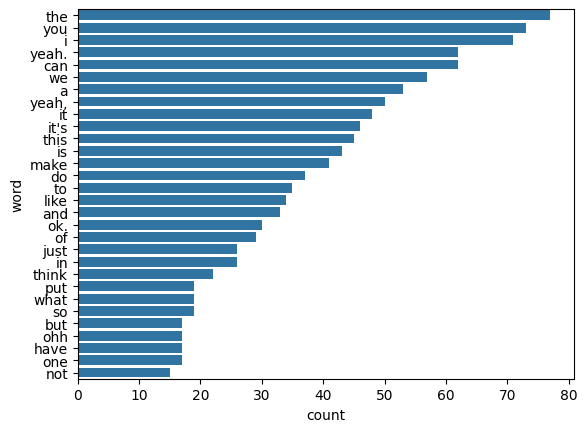

In [13]:
plot_words(transcript_wc_df, max_words=30)

In [14]:
from nltk.tokenize import word_tokenize

In [15]:
def count_words_better(list_of_utterances):
    for utterance in list_of_utterances :
        utterance = utterance.lower()
        words_in_utterance = word_tokenize(utterance)
        list_of_words.extend(words_in_utterance)
        
    master_list_of_words = list(set(list_of_words))
    word_counts = [list_of_words.count(w) for w in master_list_of_words] # list comprehension
    word_counts_dict = { "word" : master_list_of_words, 
                         "count" : word_counts }
    counts_df = pd.DataFrame(word_counts_dict)
    counts_df.sample(5)
    return counts_df

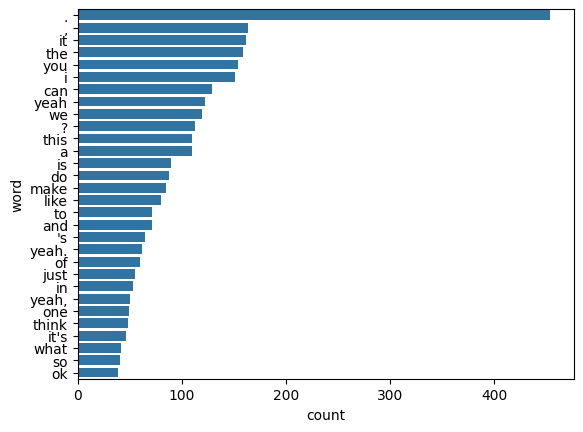

In [16]:
t_wc_df = count_words_better(utterances)
plot_words(t_wc_df, max_words=30)

In [20]:
# unique_speaker

In [21]:
# transcript_df.sample(5)

In [22]:
# george_df = transcript_df[transcript_df["speaker"] == "George"]
# george_df.sample(5)

1. Who spoke more turns among the speakers?
2. Who spoke longer sentences?
3. What are each speaker's favourite words?

In [36]:
import string

punctuations + '.'

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~.'

In [24]:
def count_words_no_puncts(list_of_utterances):
    for utterance in list_of_utterances :
        utterance = utterance.lower()
        words_in_utterance = word_tokenize(utterance)
        list_of_words.extend(words_in_utterance)
    punctuations = string.punctuation + '.'
    master_list_of_words = list(set(list_of_words))
    master_list_no_puncts = [word for word in master_list_of_words if not word in punctuations]
    word_counts = [list_of_words.count(w) for w in master_list_no_puncts] # list comprehension
    word_counts_dict = { "word" : master_list_no_puncts, 
                         "count" : word_counts }
    counts_df = pd.DataFrame(word_counts_dict)
    counts_df.sample(5)
    return counts_df

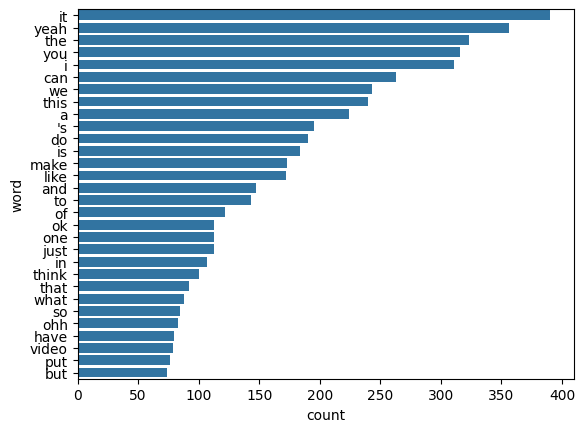

In [26]:
transcript_wc_no_puncts_df = count_words_no_puncts(utterances)
plot_words(transcript_wc_no_puncts_df, max_words=30)

In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/schandrasegara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
not 'you' in stop_words

False

In [37]:
def count_words_final(list_of_utterances):
    for utterance in list_of_utterances :
        utterance = utterance.lower()
        words_in_utterance = word_tokenize(utterance)
        list_of_words.extend(words_in_utterance)
    punctuations = string.punctuation + '.'
    stop_words = stopwords.words('english')
    master_list_of_words = list(set(list_of_words))
    master_list_final = [word for word in master_list_of_words if (not word in punctuations) and
                                                                      (not word in stop_words) ]
    word_counts = [list_of_words.count(w) for w in master_list_final] # list comprehension
    word_counts_dict = { "word" : master_list_final, 
                         "count" : word_counts }
    counts_df = pd.DataFrame(word_counts_dict)
    counts_df.sample(5)
    return counts_df

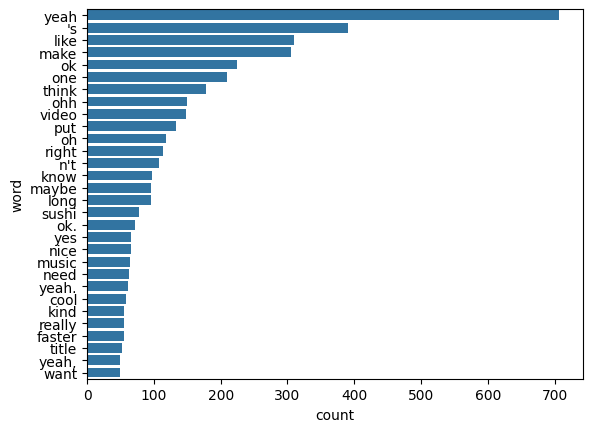

In [38]:
transcript_wc_final = count_words_final(utterances)
plot_words(transcript_wc_final, max_words=30)

In [35]:
transcript_wc_final['word'].to_list()

['feel',
 'supposed',
 "there's",
 'is.',
 'voice',
 'easy.',
 'separate',
 'small.',
 'audio,',
 "'re",
 'falling',
 'video.',
 'went,',
 'come',
 'including',
 'eat',
 'need',
 'long,',
 'installation',
 'muted.',
 'uh-huh.',
 'mac',
 'probably',
 'short.',
 'screen',
 'i.',
 '..',
 'together.',
 'present',
 'area.',
 'idea.',
 'these?',
 'sticking',
 'cup?',
 'fine',
 'watch',
 'send',
 'take',
 'another.',
 'faster',
 'maybe?',
 'problem.',
 'said',
 'more.',
 'know,',
 'their.',
 'though.',
 'think',
 'cut.',
 'stop',
 'knowledge',
 'enough.',
 'does.',
 'small',
 'sure',
 'away',
 'ones',
 'really',
 'napkin,',
 'transitions',
 'black.',
 'but.',
 'sulptures',
 'fine,',
 'pad.',
 'imove',
 'discussion',
 'bit',
 'finish',
 'yeah,',
 'wait,',
 'rice.',
 'here.',
 'bigger.',
 'well.',
 'separate.',
 'upload',
 'afterwards',
 'brackets',
 'interesting.',
 'muted',
 'feeling',
 'circle.',
 'uhh',
 'box,',
 'margarita',
 'also',
 'me.(overlapping)',
 'japanese,',
 'lot',
 'prove?',
 '

In [40]:
[w for w in word_tokenize("okay.") if not w in punctuations]

['okay']

In [41]:
from nltk.text import Text
from nltk.corpus import gutenberg

In [47]:
path_to_data_folder= '/Users/schandrasegara/research/id5138-comptext/'

In [44]:
utterances_string = ' '.join(utterances)

In [46]:
with open('./utterances_text.txt', 'w') as fo:
    fo.write(utterances_string)

In [48]:
text = Text(gutenberg.words(path_to_data_folder + 'utterances_text.txt'))

In [50]:
text.concordance('make', lines=44)

Displaying 44 of 44 matches:
o something ... Yes . But we need to make a video as well . Yeah , but . Uhh .
well . Yeah , but . Uhh .. Should we make a prototype with this one ? Yes , wi
product , process , system . You can make origami . Yeah , that ' s what I tho
nd try to see what ... Yeah . We can make flowers . Yeah . It ' s interesting 
circle . Ohh yeah I can try . Cool . Make a chopsticks with this one . Chopsti
hat ? Chopsticks ? How are you gonna make chopsticks ? How are you gonna make 
 make chopsticks ? How are you gonna make it ? I think I can . Is it a thing t
t ? I think I can . Is it a thing to make your own chopsticks ? Why ? I think 
own chopsticks ? Why ? I think I can make a shape of some space ? Ohh no . Yea
se are ready . Hmm . So are we gonna make the flower ? Ohh you can like take a
 in . Oh oh , really . Now we should make it pink . To make supper . Is it pin
ly . Now we should make it pink . To make supper . Is it pink ? Yes , Sakura i
 ' s too long , I think